In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [34]:
Training_data = pd.read_csv('Blood_samples_dataset_balanced_2(f).csv')
Test_data = pd.read_csv('blood_samples_dataset_test.csv')

In [35]:
Training_data

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,0.012956,0.336925,0.451218,0.175006,0.734664,0.382770,0.656463,0.177502,0.808162,0.684499,...,0.670665,0.311568,0.595083,0.155866,0.885812,0.636125,0.132226,0.716519,0.006121,Diabetes
2347,0.407101,0.124738,0.983306,0.663867,0.361113,0.663716,0.232516,0.341056,0.847441,0.309766,...,0.491185,0.701914,0.218104,0.790341,0.570902,0.339125,0.310964,0.310900,0.622403,Thalasse
2348,0.344356,0.783918,0.582171,0.996841,0.065363,0.242885,0.658851,0.543017,0.290106,0.838722,...,0.141738,0.155871,0.473638,0.250535,0.387197,0.344728,0.606719,0.395145,0.134021,Anemia
2349,0.351722,0.014278,0.898615,0.167550,0.727148,0.046091,0.900434,0.136227,0.134361,0.279219,...,0.570553,0.171245,0.858352,0.362012,0.290984,0.996873,0.882164,0.411158,0.146255,Diabetes


In [36]:
Training_data = Training_data.dropna()

In [37]:
Training_data = pd.get_dummies(Training_data, columns=['Disease'])
Test_data = pd.get_dummies(Test_data,columns=['Disease'])
Test_data = Test_data[Test_data['Disease_Heart Di'] != True]

In [39]:
Test_data

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease_Anemia,Disease_Diabetes,Disease_Healthy,Disease_Heart Di,Disease_Thalasse,Disease_Thromboc
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.652733,0.788235,0.054788,0.031313,False,False,False,False,True,False
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.574425,0.047025,0.607985,0.594123,False,True,False,False,False,False
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.324600,0.499504,0.436662,0.242766,False,True,False,False,False,False
6,0.677636,0.435037,0.572571,0.965847,0.010580,0.753719,0.262138,0.789804,0.541149,0.550569,...,0.213971,0.059427,0.836447,0.231356,False,True,False,False,False,False
7,0.105103,0.177558,0.169041,0.679138,0.886839,0.714977,0.197501,0.778653,0.319864,0.285914,...,0.120487,0.211855,0.376829,0.645990,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,0.596137,0.071545,0.654680,0.980213,0.503338,0.987548,0.775286,0.201622,0.263525,0.356106,...,0.754216,0.234421,0.355834,0.132999,False,True,False,False,False,False
481,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,...,0.015051,0.442730,0.196986,0.816038,False,True,False,False,False,False
483,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.559993,0.795478,0.669925,0.124874,True,False,False,False,False,False
484,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,...,0.938355,0.463381,0.862921,0.658526,False,True,False,False,False,False


In [40]:
Training_label = Training_data.filter(items=['Disease_Anemia', 'Disease_Diabetes','Disease_Healthy','Disease_Thalasse','Disease_Thromboc'])
Test_label = Test_data.filter(items=['Disease_Anemia', 'Disease_Diabetes', 'Disease_Healthy', 'Disease_Thalasse', 'Disease_Thromboc'])
Test_data_ = Test_data.drop(columns=['Disease_Anemia', 'Disease_Diabetes', 'Disease_Healthy', 'Disease_Thalasse', 'Disease_Thromboc','Disease_Heart Di'])
Training_data_ = Training_data.drop(columns=['Disease_Anemia', 'Disease_Diabetes', 'Disease_Healthy', 'Disease_Thalasse', 'Disease_Thromboc'])

In [55]:
Test_label

,Disease_Anemia,Disease_Diabetes,Disease_Healthy,Disease_Thalasse,Disease_Thromboc
0,False,False,False,True,False
1,False,True,False,False,False
3,False,True,False,False,False
6,False,True,False,False,False
7,False,True,False,False,False
...,...,...,...,...,...
480,False,True,False,False,False
481,False,True,False,False,False
483,True,False,False,False,False
484,False,True,False,False,False


In [56]:
Training_label

,Disease_Anemia,Disease_Diabetes,Disease_Healthy,Disease_Thalasse,Disease_Thromboc
0,False,False,True,False,False
1,False,True,False,False,False
2,False,False,False,True,False
3,True,False,False,False,False
4,False,False,False,True,False
...,...,...,...,...,...
2346,False,True,False,False,False
2347,False,False,False,True,False
2348,True,False,False,False,False
2349,False,True,False,False,False


一、朴素贝叶斯分类器
==============================================================================

In [79]:
from sklearn.naive_bayes import MultinomialNB

In [80]:
clf = MultinomialNB()
clf.fit(Training_data_.values, np.argmax(Training_label.values, axis=1))
result = clf.predict(Test_data_.values)

In [81]:
check = []
for i , j in zip(result, np.argmax(Test_label.values, axis=1)):
    if i == j :
        check.append(1)
    else:
        check.append(0)
        
        

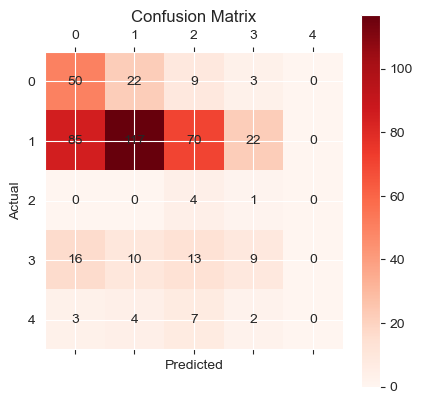

朴素贝叶斯分类的准确率:0.403


In [82]:
byes_cm = confusion_matrix(np.argmax(Test_label.values, axis=1), result )
plt.matshow(byes_cm, cmap=plt.cm.Reds)
for i in range(len(byes_cm)):
    for j in range(len(byes_cm)):
        plt.annotate(byes_cm[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')

plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()
print("朴素贝叶斯分类的准确率:%.3f"%(check.count(1) / len(check)))

0:贫血 1:糖尿病 2:健康 3:血友病 5: тром本
贝叶斯分类器分类准确率为40.3%,混淆矩阵可以看出,容易把贫血看成糖尿病,糖尿病和健康混淆,糖尿病也容易看成血友病，t病看不出来一点


二、SVM
==============================================================================

In [73]:
from sklearn import svm

1.线性核
------------------------------------------------------------------------------

In [89]:
clf = svm.SVC(kernel='linear',C = 1)
clf.fit(Training_data_.values, np.argmax(Training_label.values, axis=1))
result = clf.predict(Test_data_.values)

In [90]:
check = []
for i , j in zip(result, np.argmax(Test_label.values, axis=1)):
    if i == j :
        check.append(1)
    else:
        check.append(0)

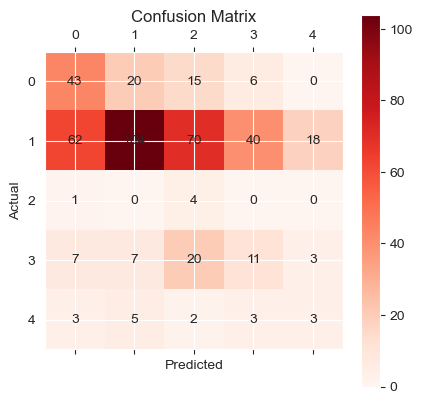

SVM 线性核的准确率:0.369


In [114]:
byes_cm = confusion_matrix(np.argmax(Test_label.values, axis=1), result )
plt.matshow(byes_cm, cmap=plt.cm.Reds)
for i in range(len(byes_cm)):
    for j in range(len(byes_cm)):
        plt.annotate(byes_cm[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')

plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()
print("SVM 线性核的准确率:%.3f"%(check.count(1) / len(check)))

2.径向基核
------------------------------------------------------------------------------

In [115]:
clf = svm.SVC(kernel='rbf',C = 1)
clf.fit(Training_data_.values, np.argmax(Training_label.values, axis=1))
result = clf.predict(Test_data_.values)

In [116]:
check = []
for i , j in zip(result, np.argmax(Test_label.values, axis=1)):
    if i == j :
        check.append(1)
    else:
        check.append(0)

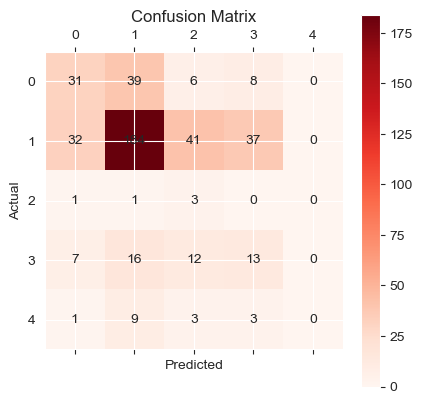

SVM 径向基核分类的准确率:0.517


In [117]:
byes_cm = confusion_matrix(np.argmax(Test_label.values, axis=1), result )
plt.matshow(byes_cm, cmap=plt.cm.Reds)
for i in range(len(byes_cm)):
    for j in range(len(byes_cm)):
        plt.annotate(byes_cm[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')

plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()
print("SVM 径向基核分类的准确率:%.3f"%(check.count(1) / len(check)))

3.多项式核
------------------------------------------------------------------------------

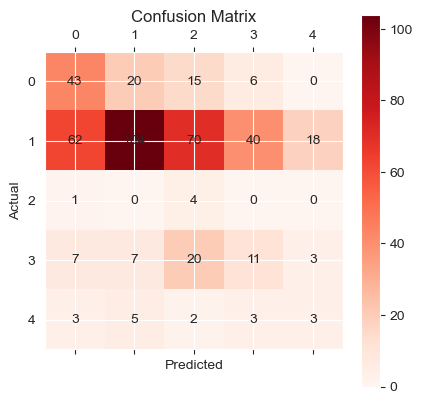

SVM 多项式核分类的准确率:0.369


In [118]:
clf = svm.SVC(kernel='poly', C=1)
clf.fit(Training_data_.values, np.argmax(Training_label.values, axis=1))
result = clf.predict(Test_data_.values)
check = []
for i, j in zip(result, np.argmax(Test_label.values, axis=1)):
    if i == j:
        check.append(1)
    else:
        check.append(0)
byes_cm = confusion_matrix(np.argmax(Test_label.values, axis=1), result)
plt.matshow(byes_cm, cmap=plt.cm.Reds)
for i in range(len(byes_cm)):
    for j in range(len(byes_cm)):
        plt.annotate(byes_cm[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')

plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()
print("SVM 多项式核分类的准确率:%.3f" % (check.count(1) / len(check)))